In [10]:
import urllib.request

def download_book():
    url = 'https://www.gutenberg.org/cache/epub/730/pg730.txt'  # Oliver Twist
    try:
        with urllib.request.urlopen(url) as response:
            text = response.read().decode('utf-8')
            print("Download successful!")
            return text
    except Exception as e:
        print("An error occurred while downloading:", e)
        return None

def main():
    book_text = download_book()
    if book_text:
        # Optional: Save to file
        with open("oliver_twist.txt", "w", encoding="utf-8") as f:
            f.write(book_text)
        print("Text saved to 'oliver_twist.txt'.")

if __name__ == "__main__":
    main()

Download successful!
Text saved to 'oliver_twist.txt'.


In [11]:
def clean_gutenberg_text(text):
    # Remove the Project Gutenberg header and footer
    start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK"
    end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK"

    start = text.find(start_marker)
    end = text.find(end_marker)

    if start != -1 and end != -1:
        text = text[start + len(start_marker):end]
    else:
        print("Warning: Start or end marker not found.")

    # Optional cleaning: remove special characters
    import re
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Keep only letters, numbers, spaces
    text = text.lower()  # Convert to lowercase
    return text


In [12]:
# load and clean saved file

# Load the text from file
with open("oliver_twist.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

# Clean it
clean_text = clean_gutenberg_text(raw_text)

# Preview first 500 characters
print(clean_text[:500])


 oliver twist 









oliver twist



or

the parish boys progress



by charles dickens





contents



i        treats of the place where oliver twist was born and of the

         circumstances attending his birth

ii       treats of oliver twists growth education and board

iii      relates how oliver twist was very near getting a place which

         would not have been a sinecure

iv       oliver being offered another place makes his first entry

         into public life

v        oli


In [13]:
# Remove Stop Words & Count Word Frequencies

!pip install nltk

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spoppe1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Remove Stop Words from Your Text

from nltk.corpus import stopwords

def remove_stop_words(text):
    words = text.split()  # Split text into list of words
    stop_words = set(stopwords.words('english'))  # Common English stop words
    filtered = [word for word in words if word not in stop_words]
    return filtered  # Returns a list of words (no stopwords)

filtered_words = remove_stop_words(clean_text)

# Show first 50 words after removing stop words
print(filtered_words[:50])

['oliver', 'twist', 'oliver', 'twist', 'parish', 'boys', 'progress', 'charles', 'dickens', 'contents', 'treats', 'place', 'oliver', 'twist', 'born', 'circumstances', 'attending', 'birth', 'ii', 'treats', 'oliver', 'twists', 'growth', 'education', 'board', 'iii', 'relates', 'oliver', 'twist', 'near', 'getting', 'place', 'would', 'sinecure', 'iv', 'oliver', 'offered', 'another', 'place', 'makes', 'first', 'entry', 'public', 'life', 'v', 'oliver', 'mingles', 'new', 'associates', 'going']


In [15]:
# Count Word Frequencies

from collections import Counter

# Count word frequency
word_freq = Counter(filtered_words)

# Show top 20 most common words
print(word_freq.most_common(20))


[('said', 1231), ('mr', 1078), ('oliver', 767), ('upon', 479), ('replied', 464), ('one', 453), ('old', 446), ('would', 410), ('man', 366), ('bumble', 365), ('sikes', 345), ('time', 323), ('gentleman', 318), ('jew', 295), ('fagin', 292), ('know', 292), ('young', 289), ('boy', 278), ('little', 274), ('dear', 274)]


In [16]:
# Summary Statistics

def calculate_summary_stats(words):
    total_words = len(words)
    unique_words = len(set(words))
    avg_word_length = sum(len(word) for word in words) / total_words

    print(f"Total words (after stop word removal): {total_words}")
    print(f"Unique words: {unique_words}")
    print(f"Average word length: {avg_word_length:.2f}")

calculate_summary_stats(filtered_words)


Total words (after stop word removal): 78543
Unique words: 11138
Average word length: 5.83


In [21]:
# Visualization (Bar Chart)

import matplotlib.pyplot as plt


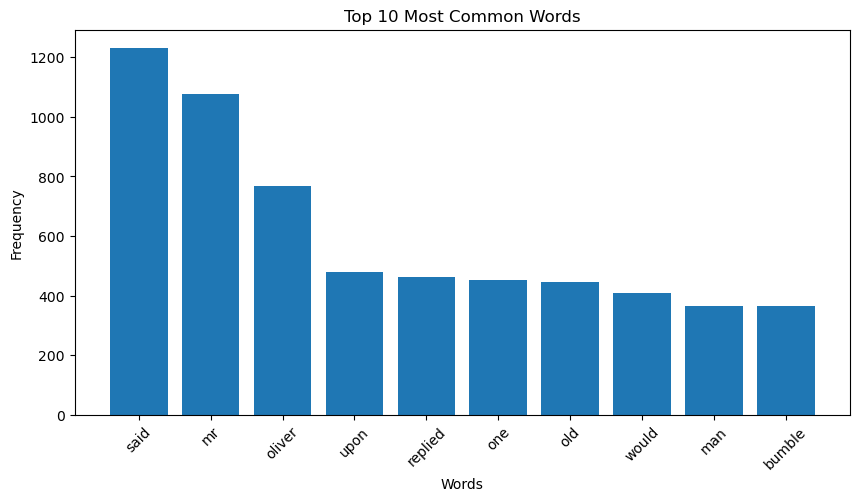

In [22]:
def plot_top_words(word_freq, n=10):
    common = word_freq.most_common(n)
    words = [word for word, count in common]
    counts = [count for word, count in common]

    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(f"Top {n} Most Common Words")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

plot_top_words(word_freq, n=10)

In [23]:
# Sentiment Analysis (Optional Feature)

import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\spoppe1\AppData\Roaming\nltk_data...


True

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Example: test on a sentence
sentence = "Oliver was happy to see his friend again!"
score = analyzer.polarity_scores(sentence)

print(f"Sentiment for: {sentence}")
print(score)


Sentiment for: Oliver was happy to see his friend again!
{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.8016}


In [25]:
# Split text into lines
lines = clean_text.split("\n")

# Analyze the first 10 non-empty lines
for line in lines:
    line = line.strip()
    if line:
        score = analyzer.polarity_scores(line)
        print(f"Line: {line[:60]}...")  # Show first 60 characters
        print(f"Sentiment: {score}")
        print()
        
        # Stop after showing 10 examples
        if lines.index(line) > 10:
            break

Line: oliver twist...
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Line: oliver twist...
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Line: or...
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

